## Installing the praw

In [3]:
!pip install praw

## Authentication

In [4]:
import praw

user_agent = "Reddit_Scrapper 1.0 by //u//FeatureChoice5036"
reddit = praw.Reddit(
    client_id="1CZ1iBdlzUPvtpHUMEqxKQ",
    client_secret="cM5KLW2vf4f5myJQ2UjtCkRwb4bxeg",
    user_agent=user_agent
)

In [5]:
import pandas as pd
import numpy as np
import re #RegEx : Regular expression

## Trending Topics - Subreddit - Robotics

In [6]:
# Hot new rising topics

headlines = set()
for submission in reddit.subreddit("Robotics").hot(limit=None):
    print(submission.title)#Subreddit Title
    print(submission.id) #ID
    print(submission.author) #Author of the subreddit
    print(submission.created_utc) #Date and time being created
    print(submission.score) # Average Score
    print(submission.upvote_ratio) # Upvote ratio
    print(submission.url) # Like to the Subreddit
    break
    headlines.add(submission.title)
print(len(headlines))

Join r/AskRobotics - our community's Q/A subreddit!
16amwkm
sleepystar96
1693916904.0
23
1.0
https://www.reddit.com/r/robotics/comments/16amwkm/join_raskrobotics_our_communitys_qa_subreddit/
0


## Get total comment in Subreddit

In [7]:
headlines = set()
for submission in reddit.subreddit("Robotics").hot(limit=None):
    headlines.add(submission.title)
print(len(headlines))

935


In [8]:
#Create a dataframe from the scrapped data 
Robotics_df = pd.DataFrame(headlines)
Robotics_df.head()

,0
0,Help to build first robot using Nvidia Jetson?...
1,An issue with running 16 MG90s motors using PC...
2,Highschool Battle Bots Ideas
3,"Advice on Self Correcting, Balancing Robot"
4,"February 28th, 9am PST -- Gazebo Community Mee..."


In [9]:
Robotics_df.head()

,0
0,Help to build first robot using Nvidia Jetson?...
1,An issue with running 16 MG90s motors using PC...
2,Highschool Battle Bots Ideas
3,"Advice on Self Correcting, Balancing Robot"
4,"February 28th, 9am PST -- Gazebo Community Mee..."


In [10]:
Robotics_df.columns

RangeIndex(start=0, stop=1, step=1)

In [11]:
Robotics_df.columns = ['Titles']

In [12]:
Robotics_df.head()

,Titles
0,Help to build first robot using Nvidia Jetson?...
1,An issue with running 16 MG90s motors using PC...
2,Highschool Battle Bots Ideas
3,"Advice on Self Correcting, Balancing Robot"
4,"February 28th, 9am PST -- Gazebo Community Mee..."


In [13]:
Robotics_df.Titles.duplicated().sum()

0

In [14]:
#Clean the text

#Create a function to clean the tweets
def cleanTxt(text):
    text = re.sub(r'@[A-Za-z0-9]+', '', text) #Remove @mentions replace with blank
    text = re.sub(r'#', '', text) #Remove the '#' symbol, replace with blank
    text = re.sub(r'RT[\s]+', '', text) #Removing RT, replace with blank
    text = re.sub(r'https?:\/\/\S+', '', text) #Remove the hyperlinks
    text = re.sub(r':', '', text) # Remove :
    
    return text

#Cleaning the text
Robotics_df["Titles"]= Robotics_df["Titles"].apply(cleanTxt)

#Show the clean text
Robotics_df.head()

,Titles
0,Help to build first robot using Nvidia Jetson?...
1,An issue with running 16 MG90s motors using PC...
2,Highschool Battle Bots Ideas
3,"Advice on Self Correcting, Balancing Robot"
4,"February 28th, 9am PST -- Gazebo Community Mee..."


In [15]:
#Next we have to remove emoji & Unicode from the reddit data.
def remove_emoji(string):
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               u"\U00002500-\U00002BEF"  # chinese char
                               u"\U00002702-\U000027B0"
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               u"\U0001f926-\U0001f937"
                               u"\U00010000-\U0010ffff"
                               u"\u2640-\u2642"
                               u"\u2600-\u2B55"
                               u"\u200d"
                               u"\u23cf"
                               u"\u23e9"
                               u"\u231a"
                               u"\ufe0f"  # dingbats
                               u"\u3030"
                               "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', string)

#Cleaning the text
Robotics_df["Titles"]= Robotics_df["Titles"].apply(remove_emoji)

#Show the clean text
Robotics_df.head()

,Titles
0,Help to build first robot using Nvidia Jetson?...
1,An issue with running 16 MG90s motors using PC...
2,Highschool Battle Bots Ideas
3,"Advice on Self Correcting, Balancing Robot"
4,"February 28th, 9am PST -- Gazebo Community Mee..."


## Installing the textlab

In [16]:
!pip install textblob

In [17]:
from textblob import TextBlob
from wordcloud import WordCloud, STOPWORDS

In [18]:
#Create a function to get the subjectivity
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

#Create a function to get Polarity
def getPolarity(text):
    return TextBlob(text).sentiment.polarity

#Now we create a new column for what we just did and add it to the Tweet_df dataframe
Robotics_df['Subjectivity'] = Robotics_df['Titles'].apply(getSubjectivity)
Robotics_df['Polarity'] = Robotics_df['Titles'].apply(getPolarity)

#Now display data
Robotics_df.head()

,Titles,Subjectivity,Polarity
0,Help to build first robot using Nvidia Jetson?...,0.216667,0.225
1,An issue with running 16 MG90s motors using PC...,0.000000,0.000
2,Highschool Battle Bots Ideas,0.000000,0.000
3,"Advice on Self Correcting, Balancing Robot",0.000000,0.000
4,"February 28th, 9am PST -- Gazebo Community Mee...",0.000000,0.000


In [19]:
#Group the range of Polarity to different categories
def getInsight(score):
    if score < 0:
        return "Negative"
    elif score == 0:
        return "Neutral"
    else:
        return "Positive"
    
Robotics_df["Insight"] = Robotics_df["Polarity"].apply(getInsight)

Robotics_df.head(50)

,Titles,Subjectivity,Polarity,Insight
0,Help to build first robot using Nvidia Jetson?...,0.216667,0.225000,Positive
1,An issue with running 16 MG90s motors using PC...,0.000000,0.000000,Neutral
2,Highschool Battle Bots Ideas,0.000000,0.000000,Neutral
3,"Advice on Self Correcting, Balancing Robot",0.000000,0.000000,Neutral
4,"February 28th, 9am PST -- Gazebo Community Mee...",0.000000,0.000000,Neutral
5,Learning agile soccer skills for a bipedal rob...,0.575000,0.250000,Positive
6,Dynamixel XH540 and Dynamixel XM430 alternativ...,0.000000,0.000000,Neutral
7,Robotics for CS undergrad,0.000000,0.000000,Neutral
8,This robot invention can do backflips better t...,0.500000,0.500000,Positive
9,Mobile robot recommendation for xArm6,0.000000,0.000000,Neutral


## Data visualization

In [20]:
import seaborn as sns
import warnings
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
plt.style.use('ggplot')

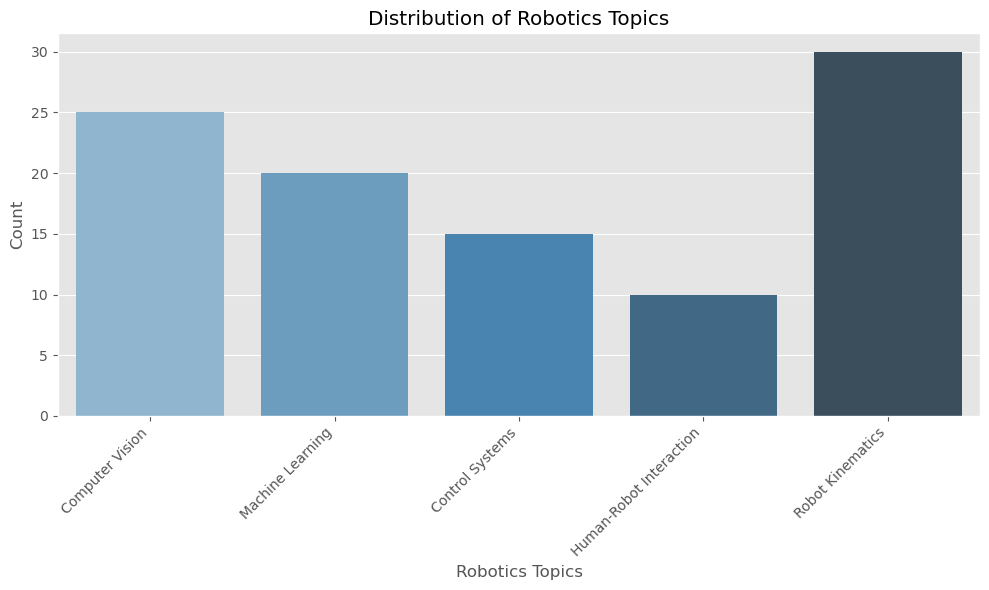

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Sample data for demonstration
data = {
    'Robotics_topic': ['Computer Vision', 'Machine Learning', 'Control Systems', 'Human-Robot Interaction', 'Robot Kinematics'],
    'Count': [25, 20, 15, 10, 30]
}

# Creating a DataFrame from the sample data
Robotics_df = pd.DataFrame(data)

# Set the plotting style to 'ggplot' (similar to 'fivethirtyeight')
plt.style.use('ggplot')

# Create a bar plot using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='Robotics_topic', y='Count', data=Robotics_df, palette='Blues_d')
plt.title('Distribution of Robotics Topics')
plt.xlabel('Robotics Topics')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()


## Wordcloud

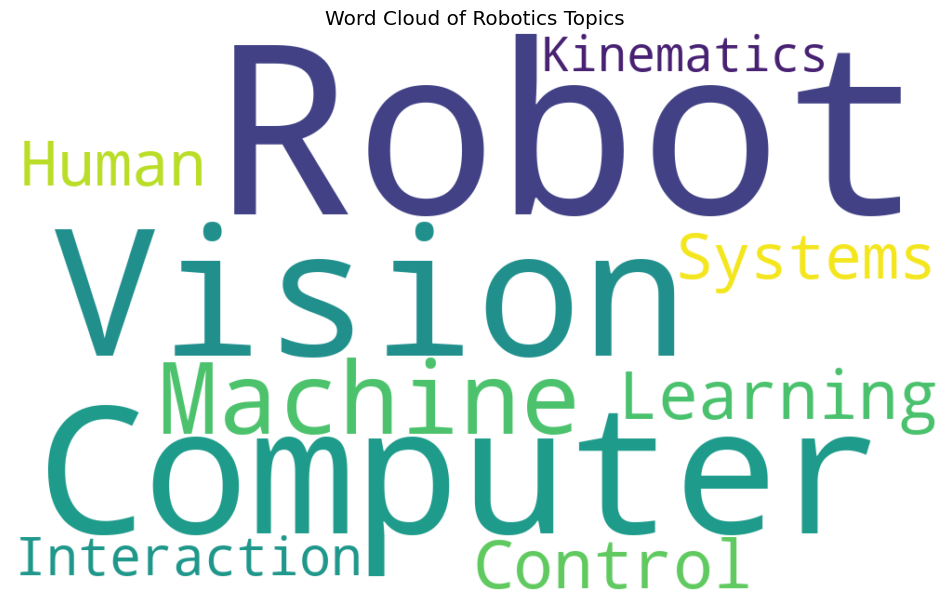

In [22]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Assuming 'Robotics_df' contains a column named 'Robotics_topic' with robotics topics
# Aggregate robotics topics into a single text string
text = ' '.join(Robotics_df['Robotics_topic'])

# Generate word cloud 
wordcloud = WordCloud(width=1000, height=600,
                      max_words=100,
                      background_color="white").generate(text)

# Display the generated image:
plt.figure(figsize=(12, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud of Robotics Topics')
plt.axis("off")
plt.show()

